# 0. Librerias

In [2]:
# Genérica
# -----------------------------------------------------------------------------
from time import time
import session_info


# Tratamientos datos
# -----------------------------------------------------------------------------
import pandas as pd
import numpy as np


# category encoders
# -----------------------------------------------------------------------------
from category_encoders import OrdinalEncoder


# scikit-learn
# -----------------------------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# LightGBM
# -----------------------------------------------------------------------------
import lightgbm as lgb


# Gráficos
# -----------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


session_info.show(html=False)

-----
category_encoders   2.6.1
lightgbm            3.3.5
matplotlib          3.7.2
numpy               1.23.5
pandas              1.5.3
seaborn             0.12.2
session_info        1.0.0
sklearn             1.3.0
-----
IPython             8.14.0
jupyter_client      8.3.0
jupyter_core        5.3.1
notebook            6.5.4
-----
Python 3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]
Linux-5.15.0-91-generic-x86_64-with-glibc2.31
-----
Session information updated at 2023-12-28 12:13


In [3]:
# Funciones
# -----------------------------------------------------------------------------
def your_function(xxx):
    pass

# 1. Cargar datos

In [3]:
# Ruta
path = './data/tablon-sell-in-4.csv'


# Cargar datos
df = pd.read_csv(
    path,
    sep=';',
    dtype={
        'Epoca_Covid': 'category',
        'Anio': 'category',
        'Trimestre': 'category',
        'Mes': 'category',
        'Cliente': 'category',
        'Tipo_Cliente': 'category',
        'Distribuidor_MSM': 'category',
        'Codigo_Postal': 'category',
        'Area_Dist': 'category',
        'Zona': 'category',
        'ID_CCAA': 'category',
        'Comunidad_Autonoma': 'category',
        'ID_Provincia': 'category',
        'Provincia': 'category',
        'Gama': 'category',
        'Formato_1': 'category',
        'Formato_2': 'category'
    })


# Castear tipo de dato
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')


# Eliminar año 2020
filtro = (df.Anio != '2020')
# filtro = (df.Anio == '2022') & (df.Tipo_Cliente == 'CON')
# filtro = (df.Cliente == '542516')
df = df[filtro]


df.head()

,Fecha,Epoca_Covid,Anio,Trimestre,Mes,Cliente,Tipo_Cliente,Distribuidor_MSM,Codigo_Postal,Area_Dist,...,IPRI,Temperatura_Minima,Temperatura_Media,Temperatura_Maxima,Precipitacion,Sell_In_3,Sell_In_2,Sell_In_1,Sell_In,STRATIO_CREATED_DATE
0,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,0.32,0.32,0.32,0.32,2023-12-14T16:00:48.156Z
1,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,0.00,0.00,0.00,0.00,2023-12-14T16:00:48.156Z
2,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,3.00,3.00,3.00,3.00,2023-12-14T16:00:48.156Z
3,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,0.06,0.06,0.06,0.06,2023-12-14T16:00:48.156Z
4,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,0.16,0.16,0.16,0.16,2023-12-14T16:00:48.156Z


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275963 entries, 0 to 2644110
Data columns (total 58 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Fecha                       int32   
 1   Epoca_Covid                 category
 2   Anio                        category
 3   Trimestre                   category
 4   Mes                         category
 5   Cliente                     category
 6   Tipo_Cliente                category
 7   Distribuidor_MSM            category
 8   Codigo_Postal               category
 9   Area_Dist                   category
 10  Zona                        category
 11  ID_Provincia                category
 12  Provincia                   category
 13  ID_CCAA                     category
 14  Comunidad_Autonoma          category
 15  Gama                        category
 16  Formato_1                   category
 17  Formato_2                   category
 18  Numerica                    float32 
 19  

In [5]:
# Eliminar columnas
df = df.drop(columns=[
    'Fecha',
    'Anio',
    'Cliente',
    'Comunidad_Autonoma',
    'Provincia',
    'Frontur',
    'Temperatura_Minima',
    'Temperatura_Maxima',
    'Movimientos_Entrada',
    'Movimientos_Salida',
    'Volumen_Solicitado',
    'STRATIO_CREATED_DATE'
])

# Eliminar registros con NaN
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275963 entries, 0 to 2644110
Data columns (total 46 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Epoca_Covid                 category
 1   Trimestre                   category
 2   Mes                         category
 3   Tipo_Cliente                category
 4   Distribuidor_MSM            category
 5   Codigo_Postal               category
 6   Area_Dist                   category
 7   Zona                        category
 8   ID_Provincia                category
 9   ID_CCAA                     category
 10  Gama                        category
 11  Formato_1                   category
 12  Formato_2                   category
 13  Numerica                    float32 
 14  Num_PdV_CI                  float32 
 15  Num_PdV_RU                  float32 
 16  Num_PdV_TU                  float32 
 17  Impactos_TV                 float64 
 18  Impactos_OOH                float64 
 19  

In [7]:
# Ordinal Encoder
categorical_features = [col for col in df.columns if df[col].dtype == 'category']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(df)

df=encoder.transform(df)

df.head()

,Epoca_Covid,Trimestre,Mes,Tipo_Cliente,Distribuidor_MSM,Codigo_Postal,Area_Dist,Zona,ID_Provincia,ID_CCAA,...,Movimientos_Neto,IPC,IPI,IPRI,Temperatura_Media,Precipitacion,Sell_In_3,Sell_In_2,Sell_In_1,Sell_In
0,1,1,1,1,1,1,1,1,1,1,...,-35963.0,1.4,102.010002,102.449997,20.379999,27.65,0.32,0.32,0.32,0.32
1,1,1,1,1,1,1,1,1,1,1,...,-35963.0,1.4,102.010002,102.449997,20.379999,27.65,0.00,0.00,0.00,0.00
2,1,1,1,1,1,1,1,1,1,1,...,-35963.0,1.4,102.010002,102.449997,20.379999,27.65,3.00,3.00,3.00,3.00
3,1,1,1,1,1,1,1,1,1,1,...,-35963.0,1.4,102.010002,102.449997,20.379999,27.65,0.06,0.06,0.06,0.06
4,1,1,1,1,1,1,1,1,1,1,...,-35963.0,1.4,102.010002,102.449997,20.379999,27.65,0.16,0.16,0.16,0.16


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275963 entries, 0 to 2644110
Data columns (total 46 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Epoca_Covid                 int64  
 1   Trimestre                   int64  
 2   Mes                         int64  
 3   Tipo_Cliente                int64  
 4   Distribuidor_MSM            int64  
 5   Codigo_Postal               int64  
 6   Area_Dist                   int64  
 7   Zona                        int64  
 8   ID_Provincia                int64  
 9   ID_CCAA                     int64  
 10  Gama                        int64  
 11  Formato_1                   int64  
 12  Formato_2                   int64  
 13  Numerica                    float32
 14  Num_PdV_CI                  float32
 15  Num_PdV_RU                  float32
 16  Num_PdV_TU                  float32
 17  Impactos_TV                 float64
 18  Impactos_OOH                float64
 19  Impresiones_Meta     

# 2. Modelos

## 2.1. Sin feature engineering

### 2.1.1. Modelo base

In [10]:
# Variable dependiente
target = 'Sell_In'

# Variables independientes
features = list(df.columns)
features.remove(target)

# Mostrar
print(f'Variable dependiente: {target}')
print(30*'-')
print(f'Variable independiente: {features}')

Variable dependiente: Sell_In
------------------------------
Variable independiente: ['Epoca_Covid', 'Trimestre', 'Mes', 'Tipo_Cliente', 'Distribuidor_MSM', 'Codigo_Postal', 'Area_Dist', 'Zona', 'ID_CCAA', 'ID_Provincia', 'Gama', 'Formato', 'Num_PdV_CI', 'Num_PdV_RU', 'Num_PdV_TU', 'Impactos_TV', 'Impactos_OOH', 'Impresiones_Meta', 'Impresiones_Pint', 'Impresiones_Digi', 'Sell_In_PP', 'Marketing_Nacional', 'Trade_Marketing', 'Marketing_PLV', 'Distancia_CdP', 'Dispersion_PdV', 'Volumen_Entregado_Perfecto', 'Nivel_Servicio', 'Tarifa_Eur_Hl', 'Margen_Distribuidor', 'Num_Festivos', 'Num_Festivos_AI', 'Egatur', 'Familitur', 'Movimientos_Neto', 'IPC', 'IPI', 'IPRI', 'Temperatura_Media', 'Precipitacion', 'Sell_In_3', 'Sell_In_2', 'Sell_In_1']


In [11]:
# Seed
seed = 123

# Separar conjunto de test y entrenamiento
train, test = train_test_split(df, train_size=0.95, test_size=0.05, random_state=seed)

In [12]:
# Instanciar modelo
max_depth = 8

mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = max_depth, # Profundidad máxima del árbol [3, 12]
    num_leaves = 80, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.9, # Feature sub-sampling
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)

In [13]:
# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])

In [14]:
# Medir tiempo
tiempo_inicial = time()

# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0

El tiempo de ejecución es de 0.957678476969401 minutos


In [26]:
metric_test_r2 = r2_score(test_y_real, test_y_pred)
metric_test_r2

0.949194897066903

In [27]:
type(metric_test_r2)

numpy.float64

In [15]:
# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.949
Test R2 Adj: 0.949

Score
--------------------------------------------------
Train: 0.872
Test: 0.807

MAE
--------------------------------------------------
Train: 2.385
Test: 3.686

RMSE
--------------------------------------------------
Train: 12.588
Test: 35.041



In [16]:
feature_imp = pd.DataFrame(sorted(zip(features, model[0].feature_importances_)), columns=['Feature', 'Value'])
feature_imp = feature_imp.sort_values(by=['Value'], ascending=False).reset_index(drop=True)
feature_imp

,Feature,Value
0,Marketing_PLV,4686
1,Sell_In_1,4653
2,Sell_In_2,4223
3,Sell_In_3,4000
4,Trade_Marketing,3930
5,Sell_In_PP,3781
6,Marketing_Nacional,3442
7,IPRI,3039
8,Tarifa_Eur_Hl,2858
9,Volumen_Entregado_Perfecto,2840


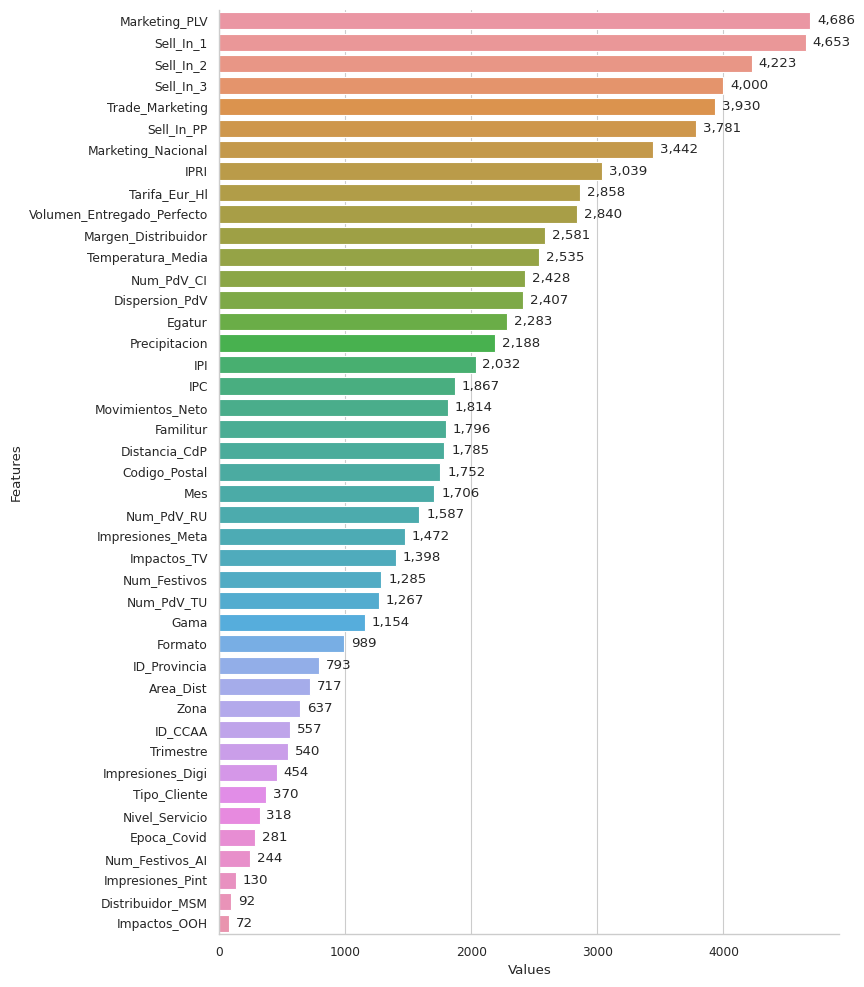

In [17]:
# Figure aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 12))

# Barplot
sns.barplot(
    x='Value',
    y='Feature',
    data=feature_imp
)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Features')

# Add values
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.0f}', padding=5)

# Show the plot
sns.despine()

### 2.1.1. Modelo optimizado

In [15]:
# scikit-learn
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, KFold


# Optuna
# -----------------------------------------------------------------------------
import optuna
import optuna.integration.lightgbm as lgb
optuna.logging.set_verbosity(optuna.logging.FATAL)


# LightGBM
# -----------------------------------------------------------------------------
from lightgbm import early_stopping
from lightgbm import log_evaluation

In [46]:
# Instanciar optimizador
dtrain = lgb.Dataset(train[features], label=train[target])

In [51]:
# Parametros de optimización
params = {
    'objective': 'regression',
    'verbosity': -1,
    'metric': 'l1', # mean_absolute_error
    'boosting_type': 'gbdt',
    'max_depth': max_depth,
    'reg_sqrt': True,
    'seed': seed
    }

In [52]:
# Optimizador
tuner = lgb.LightGBMTunerCV(
    params,
    dtrain,
    folds=KFold(n_splits=3),
    #callbacks=[early_stopping(300), log_evaluation(100)]
    )

In [53]:
# Medir tiempo
tiempo_inicial = time()

# Ejecutar optmizador
tuner.run()

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

min_data_in_leaf, val_score: 8.303001: 100%|##############| 5/5 [01:05<00:00, 13.00s/it]


El tiempo de ejecución es de 30.17111965815226 minutos


In [54]:
# Mejores parámetros
best_params = tuner.best_params
best_params

{'objective': 'regression',
 'verbosity': -1,
 'metric': 'l1',
 'boosting_type': 'gbdt',
 'max_depth': 6,
 'reg_sqrt': True,
 'seed': 123,
 'feature_pre_filter': False,
 'lambda_l1': 7.3724649841075065,
 'lambda_l2': 0.008512890141321892,
 'num_leaves': 54,
 'feature_fraction': 0.8,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20}

In [55]:
# LightGBM
# -----------------------------------------------------------------------------
import lightgbm as lgb

In [57]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt',
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = max_depth,
    num_leaves = best_params['num_leaves'],
    min_child_samples = best_params['min_child_samples'],
    bagging_fraction = best_params['bagging_fraction'],
    bagging_freq = best_params['bagging_freq'],
    feature_fraction = best_params['feature_fraction'],
    reg_alpha = best_params['lambda_l1'],
    reg_lambda = best_params['lambda_l2'],
    reg_sqrt = True,
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
metric_test_r2 = round(r2_score(test[target], model.predict(test[features])), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train[target], model.predict(train[features])), 3)
metric_test_mae = round(mean_absolute_error(test[target], model.predict(test[features])), 3)

metric_train_rmse = round(mean_squared_error(train[target], model.predict(train[features]), squared=False), 3)
metric_test_rmse = round(mean_squared_error(test[target], model.predict(test[features]), squared=False), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.965
Test R2 Adj: 0.965

MAE
--------------------------------------------------
Train: 3.379
Test: 7.605

RMSE
--------------------------------------------------
Train: 14.314
Test: 39.911



In [58]:
model

Pipeline(steps=[('mlgb',
                 LGBMRegressor(bagging_fraction=1.0, bagging_freq=0,
                               feature_fraction=0.8, feature_pre_filter=False,
                               max_depth=6, n_estimators=1000, num_leaves=54,
                               random_state=123, reg_alpha=7.3724649841075065,
                               reg_lambda=0.008512890141321892,
                               reg_sqrt=True))])

In [59]:
feature_imp = pd.DataFrame(sorted(zip(features, model[0].feature_importances_)), columns=['Feature', 'Value'])
feature_imp.sort_values(by=['Value'], ascending=False)

,Feature,Value
1,Codigo_Postal,6440
23,Mes,3278
32,Sell_In_1,3084
39,Trade_Marketing,2860
35,Sell_In_PP,2690
22,Marketing_PLV,2553
41,Volumen_Entregado_Perfecto,2425
21,Marketing_Nacional,2234
33,Sell_In_2,2215
34,Sell_In_3,2154


In [60]:
test

,Epoca_Covid,Trimestre,Mes,Tipo_Cliente,Distribuidor_MSM,Codigo_Postal,Area_Dist,Zona,ID_CCAA,ID_Provincia,...,Movimientos_Neto,IPC,IPI,IPRI,Temperatura_Media,Precipitacion,Sell_In_3,Sell_In_2,Sell_In_1,Sell_In
407595,post-covid,T1,02,CON,0,06225,Y4,Z13,11,06,...,2862.0,0.8,81.089996,109.320000,11.030000,11.000000,0.200000,0.200000,0.000000,0.100000
419583,post-covid,T1,02,CON,0,41809,Y3,ZB13,01,41,...,-130171.0,1.0,103.449997,109.830002,12.290000,3.410000,0.600000,1.260000,0.480000,0.960000
428870,post-covid,T1,03,CON,0,02630,Y2,ZB8,08,02,...,-7375.0,3.7,97.739998,110.169998,9.700000,88.599998,0.000000,0.000000,0.000000,0.300000
1851591,post-covid,T3,08,CON,0,23700,Y3,ZC13,01,23,...,-39137.0,0.4,103.080002,122.430000,28.059999,4.530000,416.279999,487.239990,197.759995,442.250000
402259,post-covid,T1,02,CON,0,49500,Y4,Z08,07,49,...,10984.0,1.1,93.389999,108.750000,6.350000,6.820000,0.320000,4.750000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460015,post-covid,T2,04,CON,0,02007,Y2,ZB8,08,02,...,5724.0,-0.1,96.279999,112.709999,11.450000,104.430000,15.600000,-0.300000,20.639999,15.480000
1851047,post-covid,T3,08,CON,0,07800,Y1,Z07,04,07,...,234126.0,0.7,92.190002,121.379997,28.610001,5.820000,352.950012,271.850006,195.229996,275.700012
1895545,post-covid,T3,09,CON,0,45300,Y4,ZM8,08,45,...,109757.0,-1.0,118.489998,117.879997,22.090000,27.990000,9.030000,-0.170000,4.260000,2.810000
1953511,post-covid,T4,11,CON,0,39792,Y6,Z03,06,39,...,27860.0,0.2,132.419998,114.279999,14.010000,178.149994,9.240000,0.000000,4.380000,0.000000


In [61]:
df_test_pred = test.copy()
df_test_pred['Sell_In_Pred'] = model.predict(test[features])

df_test_pred[['Epoca_Covid', 'Trimestre', 'Mes', 'ID_CCAA', 'ID_Provincia', 'Gama', 'Formato', 'Sell_In', 'Sell_In_Pred']]

,Epoca_Covid,Trimestre,Mes,ID_CCAA,ID_Provincia,Gama,Formato,Sell_In,Sell_In_Pred
407595,post-covid,T1,02,11,06,ABI,Medio Litro,0.100000,0.037601
419583,post-covid,T1,02,01,41,MH,Quinto,0.960000,1.080268
428870,post-covid,T1,03,08,02,ABI,Barril,0.300000,0.101281
1851591,post-covid,T3,08,01,23,MH,Tercio,442.250000,452.552243
402259,post-covid,T1,02,07,49,MH,Tercio,0.000000,0.004841
...,...,...,...,...,...,...,...,...,...
460015,post-covid,T2,04,08,02,AL,Quinto,15.480000,19.243819
1851047,post-covid,T3,08,04,07,MH,Tercio,275.700012,241.246139
1895545,post-covid,T3,09,08,45,ABI,Tercio,2.810000,0.761039
1953511,post-covid,T4,11,06,39,MH,Cuarto,0.000000,0.010403


## 2.2. Eliminando variables correlacionadas

In [22]:
# LightGBM
# -----------------------------------------------------------------------------
import lightgbm as lgb

In [23]:
# Ruta
path = './data/tablon-sell-in-3.csv'


# Cargar datos
df = pd.read_csv(
    path,
    sep=';',
    dtype={
        'Epoca_Covid': 'category',
        'Anio': 'category',
        'Trimestre': 'category',
        'Mes': 'category',
        'Cliente': 'category',
        'Tipo_Cliente': 'category',
        'Distribuidor_MSM': 'category',
        'Codigo_Postal': 'category',
        'Area_Dist': 'category',
        'Zona': 'category',
        'ID_CCAA': 'category',
        'ID_Provincia': 'category',
        'Gama': 'category',
        'Formato': 'category'
    })


# Castear tipo de dato
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')


# Eliminar año 2020
filtro = (df.Anio != '2020')
# filtro = (df.Anio == '2022') & (df.Tipo_Cliente == 'CON')
# filtro = (df.Cliente == '542516')
df = df[filtro]


df.head()

,Fecha,Epoca_Covid,Anio,Trimestre,Mes,Cliente,Tipo_Cliente,Distribuidor_MSM,Codigo_Postal,Area_Dist,...,IPRI,Temperatura_Minima,Temperatura_Media,Temperatura_Maxima,Precipitacion,Sell_In_3,Sell_In_2,Sell_In_1,Sell_In,STRATIO_CREATED_DATE
0,201809,pre-covid,2018,T3,09,1822277,DHC,0,08241,ZZ,...,102.370003,19.420000,23.410000,27.410000,32.580002,0.55,0.79,0.63,0.48,2023-09-06T22:37:10.734Z
1,201809,pre-covid,2018,T3,09,1822277,DHC,0,08241,ZZ,...,102.370003,19.420000,23.410000,27.410000,32.580002,2.40,3.00,3.30,2.70,2023-09-06T22:37:10.734Z
2,201809,pre-covid,2018,T3,09,1822277,DHC,0,08241,ZZ,...,102.370003,19.420000,23.410000,27.410000,32.580002,1.27,0.95,1.11,0.95,2023-09-06T22:37:10.734Z
3,201809,pre-covid,2018,T3,09,1822423,DHC,0,07610,ZZ,...,103.709999,20.459999,24.459999,28.450001,47.189999,0.20,0.00,0.20,0.10,2023-09-06T22:37:10.734Z
4,201809,pre-covid,2018,T3,09,1822423,DHC,0,07610,ZZ,...,103.709999,20.459999,24.459999,28.450001,47.189999,8.50,7.00,6.50,7.50,2023-09-06T22:37:10.734Z


In [24]:
# Columnas del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897461 entries, 0 to 2232236
Data columns (total 54 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Fecha                       int32   
 1   Epoca_Covid                 category
 2   Anio                        category
 3   Trimestre                   category
 4   Mes                         category
 5   Cliente                     category
 6   Tipo_Cliente                category
 7   Distribuidor_MSM            category
 8   Codigo_Postal               category
 9   Area_Dist                   category
 10  Zona                        category
 11  ID_CCAA                     category
 12  ID_Provincia                category
 13  Gama                        category
 14  Formato                     category
 15  Num_PdV_CI                  float32 
 16  Num_PdV_RU                  float32 
 17  Num_PdV_TU                  float32 
 18  Impactos_TV                 float64 
 19  

In [7]:
# Eliminar columnas
df = df.drop(columns=[
    'Fecha',
    'Anio',
    'Cliente',
    'Codigo_Postal',
    'Frontur',
    'Temperatura_Minima',
    'Temperatura_Maxima',
    'Movimientos_Entrada',
    'Movimientos_Salida',
    #'Volumen_Solicitado',
    'Volumen_Entregado_Perfecto',
    #'Sell_In_PP',
    #'Sell_In_3',
    #'Sell_In_2',
    #'Sell_In_1',
    #'Marketing_Nacional',
    #'Trade_Marketing',
    #'Marketing_PLV',
    'STRATIO_CREATED_DATE'
])

# Eliminar registros con NaN
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897461 entries, 0 to 2232236
Data columns (total 43 columns):
 #   Column               Dtype   
---  ------               -----   
 0   Epoca_Covid          category
 1   Trimestre            category
 2   Mes                  category
 3   Tipo_Cliente         category
 4   Distribuidor_MSM     category
 5   Area_Dist            category
 6   Zona                 category
 7   ID_CCAA              category
 8   ID_Provincia         category
 9   Gama                 category
 10  Formato              category
 11  Num_PdV_CI           float32 
 12  Num_PdV_RU           float32 
 13  Num_PdV_TU           float32 
 14  Impactos_TV          float64 
 15  Impactos_OOH         float64 
 16  Impresiones_Meta     float32 
 17  Impresiones_Pint     float32 
 18  Impresiones_Digi     float32 
 19  Sell_In_PP           float64 
 20  Marketing_Nacional   float64 
 21  Trade_Marketing      float64 
 22  Marketing_PLV        float64 
 23  Distanc

### 2.2.1. Modelo base I

In [21]:
# Variable dependiente
target = 'Sell_In'

# Variables independientes
features = list(df.columns)
features.remove(target)

# Mostrar
print(f'Variable dependiente: {target}')
print(30*'-')
print(f'Variable independiente: {features}')

Variable dependiente: Sell_In
------------------------------
Variable independiente: ['Epoca_Covid', 'Trimestre', 'Mes', 'Tipo_Cliente', 'Distribuidor_MSM', 'Area_Dist', 'Zona', 'ID_CCAA', 'ID_Provincia', 'Gama', 'Formato', 'Num_PdV_CI', 'Num_PdV_RU', 'Num_PdV_TU', 'Impactos_TV', 'Impactos_OOH', 'Impresiones_Meta', 'Impresiones_Pint', 'Impresiones_Digi', 'Sell_In_PP', 'Marketing_Nacional', 'Trade_Marketing', 'Marketing_PLV', 'Distancia_CdP', 'Dispersion_PdV', 'Volumen_Solicitado', 'Nivel_Servicio', 'Tarifa_Eur_Hl', 'Margen_Distribuidor', 'Num_Festivos', 'Num_Festivos_AI', 'Egatur', 'Familitur', 'Movimientos_Neto', 'IPC', 'IPI', 'IPRI', 'Temperatura_Media', 'Precipitacion', 'Sell_In_3', 'Sell_In_2', 'Sell_In_1']


In [22]:
# Seed
seed = 123

# Separar conjunto de test y entrenamiento
train, test = train_test_split(df, train_size=0.95, test_size=0.05, random_state=seed)

In [23]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = max_depth, # Profundidad máxima del árbol [3, 12]
    num_leaves = 80, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.9, # Feature sub-sampling
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)

In [24]:
# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])

In [25]:
# Medir tiempo
tiempo_inicial = time()

# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0

El tiempo de ejecución es de 1.025317339102427 minutos


In [26]:
# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.949
Test R2 Adj: 0.949

Score
--------------------------------------------------
Train: 0.876
Test: 0.809

MAE
--------------------------------------------------
Train: 2.304
Test: 3.642

RMSE
--------------------------------------------------
Train: 12.099
Test: 35.261



In [27]:
feature_imp = pd.DataFrame(sorted(zip(features, model[0].feature_importances_)), columns=['Feature', 'Value'])
feature_imp = feature_imp.sort_values(by=['Value'], ascending=False).reset_index(drop=True)
feature_imp

,Feature,Value
0,ID_Provincia,6181
1,Marketing_PLV,4817
2,Sell_In_1,4576
3,Sell_In_2,3857
4,Sell_In_3,3855
5,Mes,3764
6,Trade_Marketing,3751
7,Sell_In_PP,3627
8,Marketing_Nacional,3424
9,Volumen_Solicitado,2827


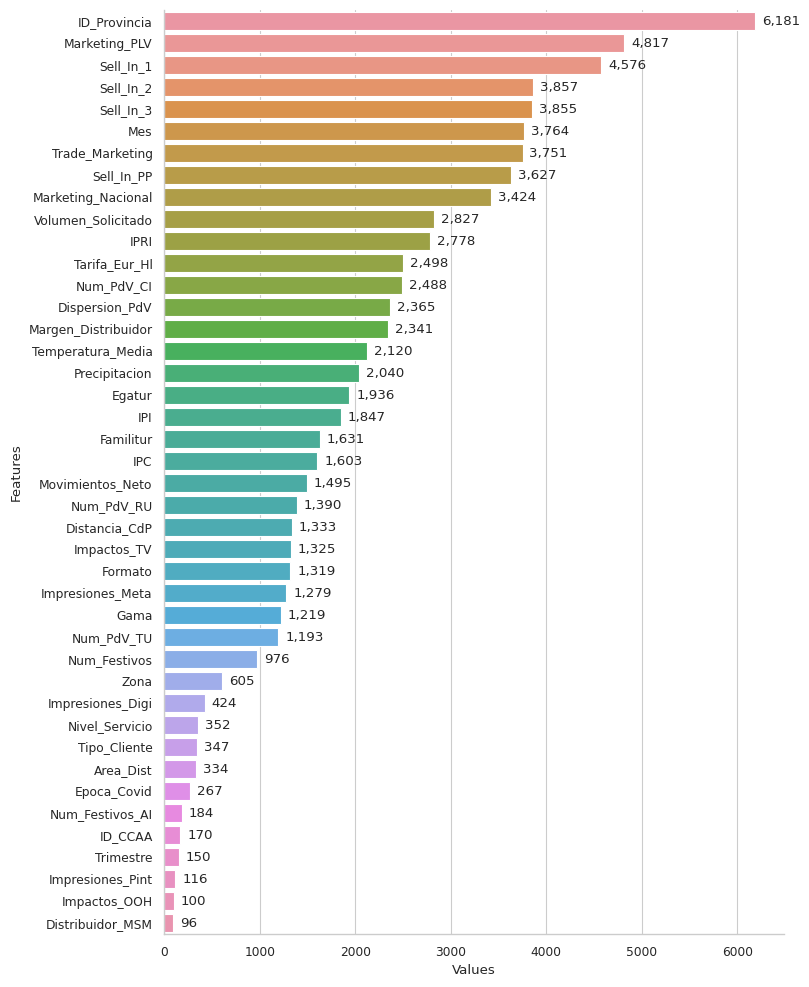

In [28]:
# Figure aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 12))

# Barplot
sns.barplot(
    x='Value',
    y='Feature',
    data=feature_imp
)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Features')

# Add values
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.0f}', padding=5)

# Show the plot
sns.despine()

### 2.2.2. Modelo base II (Definitivo Fase III)

In [87]:
# Ruta
path = './data/tablon-sell-in-3.csv'


# Cargar datos
df = pd.read_csv(
    path,
    sep=';',
    dtype={
        'Epoca_Covid': 'category',
        'Anio': 'category',
        'Trimestre': 'category',
        'Mes': 'category',
        'Cliente': 'category',
        'Tipo_Cliente': 'category',
        'Distribuidor_MSM': 'category',
        'Codigo_Postal': 'category',
        'Area_Dist': 'category',
        'Zona': 'category',
        'ID_CCAA': 'category',
        'ID_Provincia': 'category',
        'Gama': 'category',
        'Formato': 'category'
    })


# Castear tipo de dato
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')


# Eliminar año 2020
filtro = (df.Anio != '2020')
# filtro = (df.Anio == '2022') & (df.Tipo_Cliente == 'CON')
# filtro = (df.Cliente == '542516')
df = df[filtro]


df.head()

,Fecha,Epoca_Covid,Anio,Trimestre,Mes,Cliente,Tipo_Cliente,Distribuidor_MSM,Codigo_Postal,Area_Dist,...,IPRI,Temperatura_Minima,Temperatura_Media,Temperatura_Maxima,Precipitacion,Sell_In_3,Sell_In_2,Sell_In_1,Sell_In,STRATIO_CREATED_DATE
0,201809,pre-covid,2018,T3,09,1822277,DHC,0,08241,ZZ,...,102.370003,19.420000,23.410000,27.410000,32.580002,0.55,0.79,0.63,0.48,2023-09-06T22:37:10.734Z
1,201809,pre-covid,2018,T3,09,1822277,DHC,0,08241,ZZ,...,102.370003,19.420000,23.410000,27.410000,32.580002,2.40,3.00,3.30,2.70,2023-09-06T22:37:10.734Z
2,201809,pre-covid,2018,T3,09,1822277,DHC,0,08241,ZZ,...,102.370003,19.420000,23.410000,27.410000,32.580002,1.27,0.95,1.11,0.95,2023-09-06T22:37:10.734Z
3,201809,pre-covid,2018,T3,09,1822423,DHC,0,07610,ZZ,...,103.709999,20.459999,24.459999,28.450001,47.189999,0.20,0.00,0.20,0.10,2023-09-06T22:37:10.734Z
4,201809,pre-covid,2018,T3,09,1822423,DHC,0,07610,ZZ,...,103.709999,20.459999,24.459999,28.450001,47.189999,8.50,7.00,6.50,7.50,2023-09-06T22:37:10.734Z


In [88]:
# Eliminar columnas
df = df.drop(columns=[
    'Fecha',
    'Anio',
    'Cliente',
    'Codigo_Postal',
    'Frontur',
    'Temperatura_Minima',
    'Temperatura_Maxima',
    'Movimientos_Entrada',
    'Movimientos_Salida',
    #'Volumen_Solicitado',
    'Volumen_Entregado_Perfecto',
    #'Sell_In_PP',
    'Sell_In_3',
    'Sell_In_2',
    #'Sell_In_1',
    #'Marketing_Nacional',
    #'Trade_Marketing',
    #'Marketing_PLV',
    'STRATIO_CREATED_DATE'
])

# Eliminar registros con NaN
df = df.dropna()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897461 entries, 0 to 2232236
Data columns (total 41 columns):
 #   Column               Dtype   
---  ------               -----   
 0   Epoca_Covid          category
 1   Trimestre            category
 2   Mes                  category
 3   Tipo_Cliente         category
 4   Distribuidor_MSM     category
 5   Area_Dist            category
 6   Zona                 category
 7   ID_CCAA              category
 8   ID_Provincia         category
 9   Gama                 category
 10  Formato              category
 11  Num_PdV_CI           float32 
 12  Num_PdV_RU           float32 
 13  Num_PdV_TU           float32 
 14  Impactos_TV          float64 
 15  Impactos_OOH         float64 
 16  Impresiones_Meta     float32 
 17  Impresiones_Pint     float32 
 18  Impresiones_Digi     float32 
 19  Sell_In_PP           float64 
 20  Marketing_Nacional   float64 
 21  Trade_Marketing      float64 
 22  Marketing_PLV        float64 
 23  Distanc

In [90]:
# Variable dependiente
target = 'Sell_In'

# Variables independientes
features = list(df.columns)
features.remove(target)

# Mostrar
print(f'Variable dependiente: {target}')
print(30*'-')
print(f'Variable independiente: {features}')

Variable dependiente: Sell_In
------------------------------
Variable independiente: ['Epoca_Covid', 'Trimestre', 'Mes', 'Tipo_Cliente', 'Distribuidor_MSM', 'Area_Dist', 'Zona', 'ID_CCAA', 'ID_Provincia', 'Gama', 'Formato', 'Num_PdV_CI', 'Num_PdV_RU', 'Num_PdV_TU', 'Impactos_TV', 'Impactos_OOH', 'Impresiones_Meta', 'Impresiones_Pint', 'Impresiones_Digi', 'Sell_In_PP', 'Marketing_Nacional', 'Trade_Marketing', 'Marketing_PLV', 'Distancia_CdP', 'Dispersion_PdV', 'Volumen_Solicitado', 'Nivel_Servicio', 'Tarifa_Eur_Hl', 'Margen_Distribuidor', 'Num_Festivos', 'Num_Festivos_AI', 'Egatur', 'Familitur', 'Movimientos_Neto', 'IPC', 'IPI', 'IPRI', 'Temperatura_Media', 'Precipitacion', 'Sell_In_1']


In [91]:
# Seed
seed = 123

# Separar conjunto de test y entrenamiento
train, test = train_test_split(df, train_size=0.95, test_size=0.05, random_state=seed)

In [92]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = max_depth, # Profundidad máxima del árbol [3, 12]
    num_leaves = 80, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.9, # Feature sub-sampling
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)

In [93]:
# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])

In [94]:
# Medir tiempo
tiempo_inicial = time()

# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0

El tiempo de ejecución es de 0.91995134751002 minutos


In [95]:
# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.955
Test R2 Adj: 0.955

Score
--------------------------------------------------
Train: 0.87
Test: 0.802

MAE
--------------------------------------------------
Train: 2.425
Test: 3.769

RMSE
--------------------------------------------------
Train: 12.414
Test: 33.088



In [96]:
feature_imp = pd.DataFrame(sorted(zip(features, model[0].feature_importances_)), columns=['Feature', 'Value'])
feature_imp = feature_imp.sort_values(by=['Value'], ascending=False).reset_index(drop=True)
feature_imp

,Feature,Value
0,ID_Provincia,6648
1,Sell_In_1,5912
2,Marketing_PLV,5205
3,Sell_In_PP,4736
4,Trade_Marketing,4009
5,Marketing_Nacional,3736
6,Mes,3662
7,Tarifa_Eur_Hl,3243
8,IPRI,3087
9,Volumen_Solicitado,2981


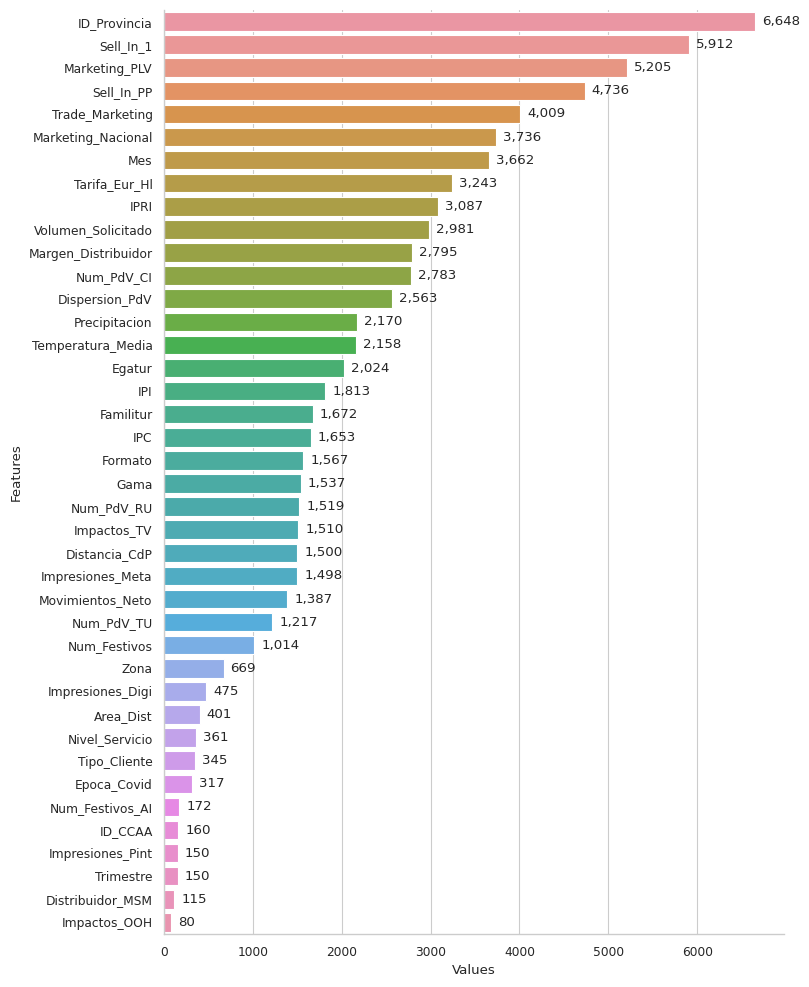

In [97]:
# Figure aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 12))

# Barplot
sns.barplot(
    x='Value',
    y='Feature',
    data=feature_imp
)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Features')

# Add values
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.0f}', padding=5)

# Show the plot
sns.despine()

#### 2.2.2.1. Modelo base II optimizado I

In [78]:
# scikit-learn
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, KFold


# Optuna
# -----------------------------------------------------------------------------
import optuna
import optuna.integration.lightgbm as lgb
optuna.logging.set_verbosity(optuna.logging.FATAL)


# LightGBM
# -----------------------------------------------------------------------------
from lightgbm import early_stopping
from lightgbm import log_evaluation

In [ ]:
# Instanciar optimizador
dtrain = lgb.Dataset(train[features], label=train[target])

In [26]:
# Parametros de optimización
max_depth = 8

params = {
    'objective': 'regression',
    'verbosity': -1,
    'metric': 'l1', # mean_absolute_error
    'boosting_type': 'gbdt',
    'max_depth': max_depth,
    'reg_sqrt': True,
    'seed': seed
    }

In [27]:
# Optimizador
tuner = lgb.LightGBMTunerCV(
    params,
    dtrain,
    folds=KFold(n_splits=3),
    #callbacks=[early_stopping(300), log_evaluation(100)]
    )

In [28]:
# Medir tiempo
tiempo_inicial = time()

# Ejecutar optmizador
tuner.run()

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

min_data_in_leaf, val_score: 3.603745: 100%|#############| 5/5 [16:36<00:00, 199.24s/it]


El tiempo de ejecución es de 221.9633491198222 minutos


In [29]:
# Mejores parámetros
best_params = tuner.best_params
best_params

{'objective': 'regression',
 'verbosity': -1,
 'metric': 'l1',
 'boosting_type': 'gbdt',
 'max_depth': 8,
 'reg_sqrt': True,
 'seed': 123,
 'feature_pre_filter': False,
 'lambda_l1': 6.795024578746776e-08,
 'lambda_l2': 6.617711049167804,
 'num_leaves': 203,
 'feature_fraction': 0.82,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 10}

In [30]:
# LightGBM
# -----------------------------------------------------------------------------
import lightgbm as lgb

# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt',
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = max_depth,
    num_leaves = best_params['num_leaves'],
    min_child_samples = best_params['min_child_samples'],
    bagging_fraction = best_params['bagging_fraction'],
    bagging_freq = best_params['bagging_freq'],
    feature_fraction = best_params['feature_fraction'],
    reg_alpha = best_params['lambda_l1'],
    reg_lambda = best_params['lambda_l2'],
    reg_sqrt = True,
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)

# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])

# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])
test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.961
Test R2 Adj: 0.961

Score
--------------------------------------------------
Train: 0.892
Test: 0.811

MAE
--------------------------------------------------
Train: 2.01
Test: 3.601

RMSE
--------------------------------------------------
Train: 9.627
Test: 30.785



In [31]:
feature_imp = pd.DataFrame(sorted(zip(features, model[0].feature_importances_)), columns=['Feature', 'Value'])
feature_imp = feature_imp.sort_values(by=['Value'], ascending=False).reset_index(drop=True)
feature_imp

,Feature,Value
0,ID_Provincia,12309
1,Marketing_PLV,11190
2,Sell_In_1,10998
3,Sell_In_PP,9817
4,Trade_Marketing,8673
5,Marketing_Nacional,8485
6,Tarifa_Eur_Hl,7793
7,Margen_Distribuidor,6932
8,Mes,6823
9,IPRI,6726


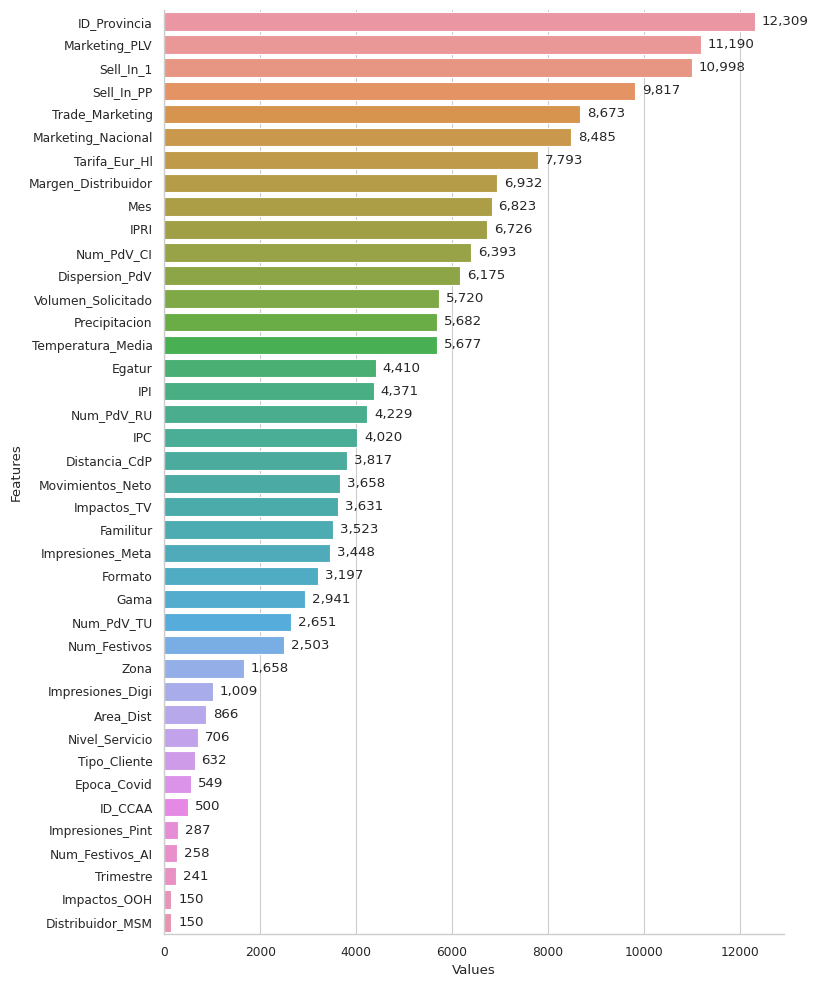

In [32]:
# Figure aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 12))

# Barplot
sns.barplot(
    x='Value',
    y='Feature',
    data=feature_imp
)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Features')

# Add values
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.0f}', padding=5)

# Show the plot
sns.despine()

#### 2.2.2.2. Modelo base II optimizado II

In [33]:
# scikit-learn
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, KFold


# Optuna
# -----------------------------------------------------------------------------
import optuna
import optuna.integration.lightgbm as lgb
optuna.logging.set_verbosity(optuna.logging.FATAL)


# LightGBM
# -----------------------------------------------------------------------------
from lightgbm import early_stopping
from lightgbm import log_evaluation

In [34]:
# Instanciar optimizador
dtrain = lgb.Dataset(train[features], label=train[target])

In [35]:
# Parametros de optimización
max_depth = 10

params = {
    'objective': 'regression',
    'verbosity': -1,
    'metric': 'l1', # mean_absolute_error
    'boosting_type': 'gbdt',
    'max_depth': max_depth,
    'reg_sqrt': True,
    'seed': seed
    }

In [36]:
# Optimizador
tuner = lgb.LightGBMTunerCV(
    params,
    dtrain,
    folds=KFold(n_splits=3),
    #callbacks=[early_stopping(300), log_evaluation(100)]
    )

In [37]:
# Medir tiempo
tiempo_inicial = time()

# Ejecutar optmizador
tuner.run()

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

min_data_in_leaf, val_score: 3.535469: 100%|#############| 5/5 [25:52<00:00, 310.48s/it]


El tiempo de ejecución es de 320.1155940890312 minutos


In [38]:
# Mejores parámetros
best_params = tuner.best_params
best_params

{'objective': 'regression',
 'verbosity': -1,
 'metric': 'l1',
 'boosting_type': 'gbdt',
 'max_depth': 10,
 'reg_sqrt': True,
 'seed': 123,
 'feature_pre_filter': False,
 'lambda_l1': 0.06174136438382307,
 'lambda_l2': 4.457103858764064,
 'num_leaves': 325,
 'feature_fraction': 0.82,
 'bagging_fraction': 0.9959618384396407,
 'bagging_freq': 6,
 'min_child_samples': 20}

In [39]:
# LightGBM
# -----------------------------------------------------------------------------
import lightgbm as lgb

# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt',
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = max_depth,
    num_leaves = best_params['num_leaves'],
    min_child_samples = best_params['min_child_samples'],
    bagging_fraction = best_params['bagging_fraction'],
    bagging_freq = best_params['bagging_freq'],
    feature_fraction = best_params['feature_fraction'],
    reg_alpha = best_params['lambda_l1'],
    reg_lambda = best_params['lambda_l2'],
    reg_sqrt = True,
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)

# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])

# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.953
Test R2 Adj: 0.953

Score
--------------------------------------------------
Train: 0.918
Test: 0.814

MAE
--------------------------------------------------
Train: 1.526
Test: 3.55

RMSE
--------------------------------------------------
Train: 7.326
Test: 33.671



In [40]:
feature_imp = pd.DataFrame(sorted(zip(features, model[0].feature_importances_)), columns=['Feature', 'Value'])
feature_imp = feature_imp.sort_values(by=['Value'], ascending=False).reset_index(drop=True)
feature_imp

,Feature,Value
0,ID_Provincia,19908
1,Marketing_PLV,19502
2,Sell_In_1,18351
3,Sell_In_PP,16861
4,Marketing_Nacional,15382
5,Trade_Marketing,15195
6,Tarifa_Eur_Hl,14398
7,Margen_Distribuidor,12928
8,Num_PdV_CI,12267
9,IPRI,12265


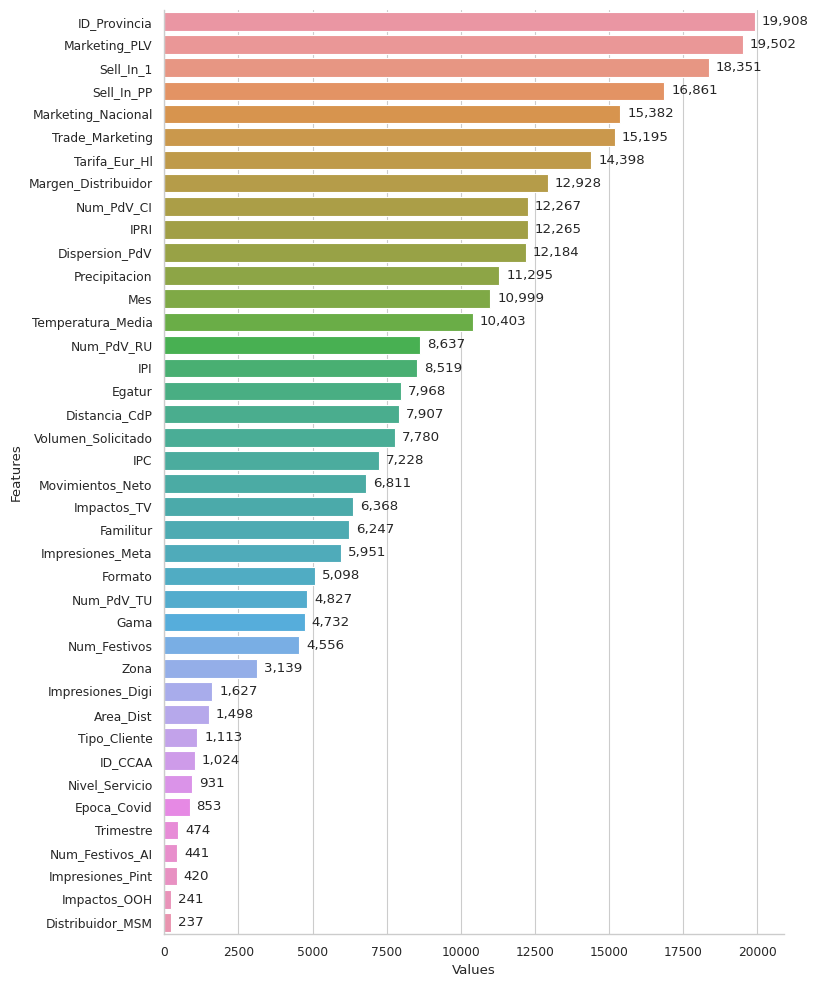

In [41]:
# Figure aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 12))

# Barplot
sns.barplot(
    x='Value',
    y='Feature',
    data=feature_imp
)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Features')

# Add values
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.0f}', padding=5)

# Show the plot
sns.despine()

### 2.2.3. Modelo base III (Fase IV - Depth = 8)

In [3]:
# Ruta
path = './data/tablon-sell-in-4.csv'


# Cargar datos
df = pd.read_csv(
    path,
    sep=';',
    dtype={
        'Epoca_Covid': 'category',
        'Anio': 'category',
        'Trimestre': 'category',
        'Mes': 'category',
        'Cliente': 'category',
        'Tipo_Cliente': 'category',
        'Distribuidor_MSM': 'category',
        'Codigo_Postal': 'category',
        'Area_Dist': 'category',
        'Zona': 'category',
        'ID_CCAA': 'category',
        'Comunidad_Autonoma': 'category',
        'ID_Provincia': 'category',
        'Provincia': 'category',
        'Gama': 'category',
        'Formato_1': 'category',
        'Formato_2': 'category'
    })


# Castear tipo de dato
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')


# Eliminar año 2020
filtro = (df.Anio != '2020')
# filtro = (df.Anio == '2022') & (df.Tipo_Cliente == 'CON')
# filtro = (df.Cliente == '542516')
df = df[filtro]


df.head()

,Fecha,Epoca_Covid,Anio,Trimestre,Mes,Cliente,Tipo_Cliente,Distribuidor_MSM,Codigo_Postal,Area_Dist,...,IPRI,Temperatura_Minima,Temperatura_Media,Temperatura_Maxima,Precipitacion,Sell_In_3,Sell_In_2,Sell_In_1,Sell_In,STRATIO_CREATED_DATE
0,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,0.32,0.32,0.32,0.32,2023-12-14T16:00:48.156Z
1,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,0.00,0.00,0.00,0.00,2023-12-14T16:00:48.156Z
2,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,3.00,3.00,3.00,3.00,2023-12-14T16:00:48.156Z
3,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,0.06,0.06,0.06,0.06,2023-12-14T16:00:48.156Z
4,201610,pre-covid,2016,T4,10,534564,DHC,0,30004,ZZ,...,102.449997,15.11,20.379999,25.66,27.65,0.16,0.16,0.16,0.16,2023-12-14T16:00:48.156Z


In [4]:
# Eliminar columnas
df = df.drop(columns=[
    'Fecha',                      # Mucha precisión, no generaliza el modelo
    'Anio',                       # Mucha precisión, no generaliza el modelo
    'Cliente',                    # Mucha precisión, no generaliza el modelo
    'Codigo_Postal',              # Mucha precisión, no generaliza el modelo
    'Frontur',                    # Colinear
    'Temperatura_Minima',         # Colinear
    'Temperatura_Maxima',         # Colinear
    'Movimientos_Entrada',        # Colinear
    'Movimientos_Salida',         # Colinear
    'Volumen_Entregado_Perfecto', # Colinear
    'Sell_In_3',                  # Colinear
    'Sell_In_2',                  # Colinear
    'Comunidad_Autonoma',         # Colinear
    'Provincia',                  # Colinear
    'Numerica',                   # Colinear
    'ID_CCAA',                    # Poco feature importance
    'Trimestre',                  # Poco feature importance
    'Distribuidor_MSM',           # Poco feature importance
    'Zona',                       # Poco feature importance
    # 'Num_PdV_CI',                 # Poco feature importance
    # 'Num_PdV_RU',                 # Poco feature importance
    # 'Num_PdV_TU',                 # Poco feature importance
    'Impactos_OOH',               # Poco feature importance
    'Impresiones_Meta',           # Poco feature importance
    'Impresiones_Pint',           # Poco feature importance
    'Impresiones_Digi',           # Poco feature importance
    'Distancia_CdP',              # Poco feature importance
    'Nivel_Servicio',             # Poco feature importance
    'Num_Festivos',               # Poco feature importance
    'Num_Festivos_AI',            # Poco feature importance
    'Movimientos_Neto',           # Poco feature importance
    # 'IPC',                        # Poco feature importance
    'IPI',                        # Poco feature importance
    # 'Temperatura_Media',          # Poco feature importance
    # 'Precipitacion',              # Poco feature importance
    'STRATIO_CREATED_DATE'        # Auditoría
])

# Eliminar registros con NaN
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275963 entries, 0 to 2644110
Data columns (total 28 columns):
 #   Column               Dtype   
---  ------               -----   
 0   Epoca_Covid          category
 1   Mes                  category
 2   Tipo_Cliente         category
 3   Area_Dist            category
 4   ID_Provincia         category
 5   Gama                 category
 6   Formato_1            category
 7   Formato_2            category
 8   Num_PdV_CI           float32 
 9   Num_PdV_RU           float32 
 10  Num_PdV_TU           float32 
 11  Impactos_TV          float64 
 12  Sell_In_PP           float64 
 13  Marketing_Nacional   float64 
 14  Trade_Marketing      float64 
 15  Marketing_PLV        float64 
 16  Dispersion_PdV       float32 
 17  Volumen_Solicitado   float32 
 18  Tarifa_Eur_Hl        float64 
 19  Margen_Distribuidor  float64 
 20  Egatur               float32 
 21  Familitur            float32 
 22  IPC                  float32 
 23  IPRI   

In [6]:
# Variable dependiente
target = 'Sell_In'

# Variables independientes
features = list(df.columns)
features.remove(target)

# Mostrar
print(f'Variable dependiente: {target}')
print(30*'-')
print(f'Variable independiente: {features}')

Variable dependiente: Sell_In
------------------------------
Variable independiente: ['Epoca_Covid', 'Mes', 'Tipo_Cliente', 'Area_Dist', 'ID_Provincia', 'Gama', 'Formato_1', 'Formato_2', 'Num_PdV_CI', 'Num_PdV_RU', 'Num_PdV_TU', 'Impactos_TV', 'Sell_In_PP', 'Marketing_Nacional', 'Trade_Marketing', 'Marketing_PLV', 'Dispersion_PdV', 'Volumen_Solicitado', 'Tarifa_Eur_Hl', 'Margen_Distribuidor', 'Egatur', 'Familitur', 'IPC', 'IPRI', 'Temperatura_Media', 'Precipitacion', 'Sell_In_1']


In [11]:
# Seed
seed = 123

# Separar conjunto de test y entrenamiento
train, test = train_test_split(df, train_size=0.95, test_size=0.05, random_state=seed)

In [12]:
# Instanciar encoder
categorical_features = [col for col in features if df[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True
    )

In [13]:
# Instanciar modelo
max_depth = 8

mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = max_depth, # Profundidad máxima del árbol [3, 12]
    num_leaves = 120, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.8, # Feature sub-sampling
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)

In [14]:
# Pipeline
model_pipeline = Pipeline([
        ("encoder", encoder),
        ("mlgb", mlgb)
    ])

In [15]:
# Medir tiempo
tiempo_inicial = time()

# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0

El tiempo de ejecución es de 1.1048076272010803 minutos


In [16]:
# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.965
Test R2 Adj: 0.965

Score
--------------------------------------------------
Train: 0.873
Test: 0.807

MAE
--------------------------------------------------
Train: 2.192
Test: 3.207

RMSE
--------------------------------------------------
Train: 11.159
Test: 23.61



In [18]:
feature_imp = pd.DataFrame(sorted(zip(features, model[1].feature_importances_)), columns=['Feature', 'Value'])
feature_imp = feature_imp.sort_values(by=['Value'], ascending=False).reset_index(drop=True)
feature_imp

,Feature,Value
0,ID_Provincia,10254
1,Sell_In_1,9142
2,Sell_In_PP,7188
3,Marketing_PLV,7018
4,IPRI,5967
5,Tarifa_Eur_Hl,5939
6,Trade_Marketing,5885
7,Marketing_Nacional,5651
8,Mes,5497
9,Margen_Distribuidor,5302


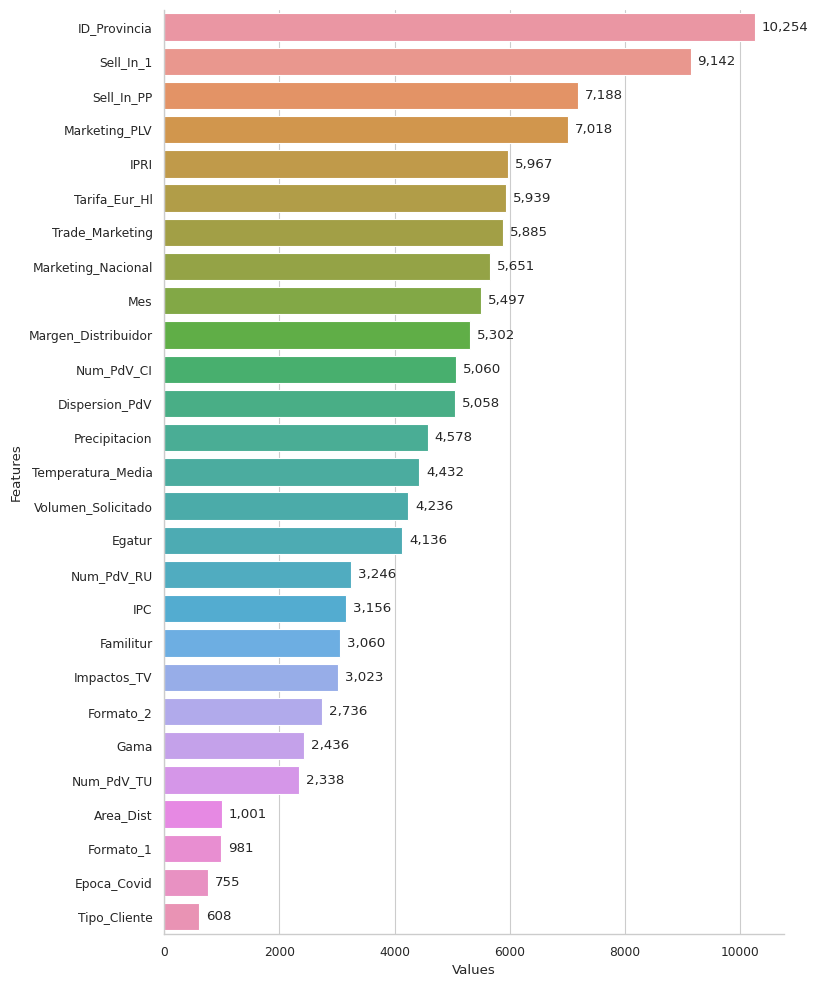

In [14]:
# Figure aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 12))

# Barplot
sns.barplot(
    x='Value',
    y='Feature',
    data=feature_imp
)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Features')

# Add values
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.0f}', padding=5)

# Show the plot
sns.despine()

#### 2.2.3.1. Modelo base III optimizado I

In [20]:
# scikit-learn
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, KFold


# Optuna
# -----------------------------------------------------------------------------
import optuna
import optuna.integration.lightgbm as lgb
optuna.logging.set_verbosity(optuna.logging.FATAL)


# LightGBM
# -----------------------------------------------------------------------------
from lightgbm import early_stopping
from lightgbm import log_evaluation

In [21]:
# Instanciar optimizador
dtrain = lgb.Dataset(train[features], label=train[target])

In [22]:
# Parametros de optimización
max_depth = 8

params = {
    'objective': 'regression',
    'verbosity': -1,
    'metric': 'l1', # mean_absolute_error
    'boosting_type': 'gbdt',
    'max_depth': max_depth,
    'reg_sqrt': True,
    'seed': seed
    }

In [23]:
# Optimizador
tuner = lgb.LightGBMTunerCV(
    params,
    dtrain,
    folds=KFold(n_splits=3),
    #callbacks=[early_stopping(300), log_evaluation(100)]
    )

In [24]:
# Medir tiempo
tiempo_inicial = time()

# Ejecutar optmizador
tuner.run()

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

min_data_in_leaf, val_score: 3.434087: 100%|######################################################################################################| 5/5 [15:45<00:00, 189.18s/it]


El tiempo de ejecución es de 202.35996822516123 minutos


In [25]:
# Mejores parámetros
best_params = tuner.best_params
best_params

{'objective': 'regression',
 'verbosity': -1,
 'metric': 'l1',
 'boosting_type': 'gbdt',
 'max_depth': 8,
 'reg_sqrt': True,
 'seed': 123,
 'feature_pre_filter': False,
 'lambda_l1': 6.280201792745157,
 'lambda_l2': 6.908640084788295,
 'num_leaves': 192,
 'feature_fraction': 0.784,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 5}

In [26]:
# LightGBM
# -----------------------------------------------------------------------------
import lightgbm as lgb

In [27]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt',
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = max_depth,
    num_leaves = best_params['num_leaves'],
    min_child_samples = best_params['min_child_samples'],
    bagging_fraction = best_params['bagging_fraction'],
    bagging_freq = best_params['bagging_freq'],
    feature_fraction = best_params['feature_fraction'],
    reg_alpha = best_params['lambda_l1'],
    reg_lambda = best_params['lambda_l2'],
    reg_sqrt = True,
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.966
Test R2 Adj: 0.966

Score
--------------------------------------------------
Train: 0.878
Test: 0.808

MAE
--------------------------------------------------
Train: 2.097
Test: 3.176

RMSE
--------------------------------------------------
Train: 10.616
Test: 23.09



### 2.2.4. Modelo base III (Fase IV - Depth = 10)

In [15]:
# Instanciar modelo
max_depth = 10

mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = max_depth, # Profundidad máxima del árbol [3, 12]
    num_leaves = 350, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.8, # Feature sub-sampling
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)

In [16]:
# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])

In [17]:
# Medir tiempo
tiempo_inicial = time()

# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0

El tiempo de ejecución es de 2.0778605302174884 minutos


In [18]:
# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.965
Test R2 Adj: 0.965

Score
--------------------------------------------------
Train: 0.916
Test: 0.813

MAE
--------------------------------------------------
Train: 1.454
Test: 3.109

RMSE
--------------------------------------------------
Train: 6.515
Test: 23.405



In [19]:
feature_imp = pd.DataFrame(sorted(zip(features, model[0].feature_importances_)), columns=['Feature', 'Value'])
feature_imp = feature_imp.sort_values(by=['Value'], ascending=False).reset_index(drop=True)
feature_imp

,Feature,Value
0,Sell_In_1,24204
1,ID_Provincia,23705
2,Sell_In_PP,20983
3,Marketing_PLV,20900
4,Tarifa_Eur_Hl,19128
5,IPRI,18039
6,Marketing_Nacional,17323
7,Trade_Marketing,17133
8,Margen_Distribuidor,16920
9,Dispersion_PdV,16216


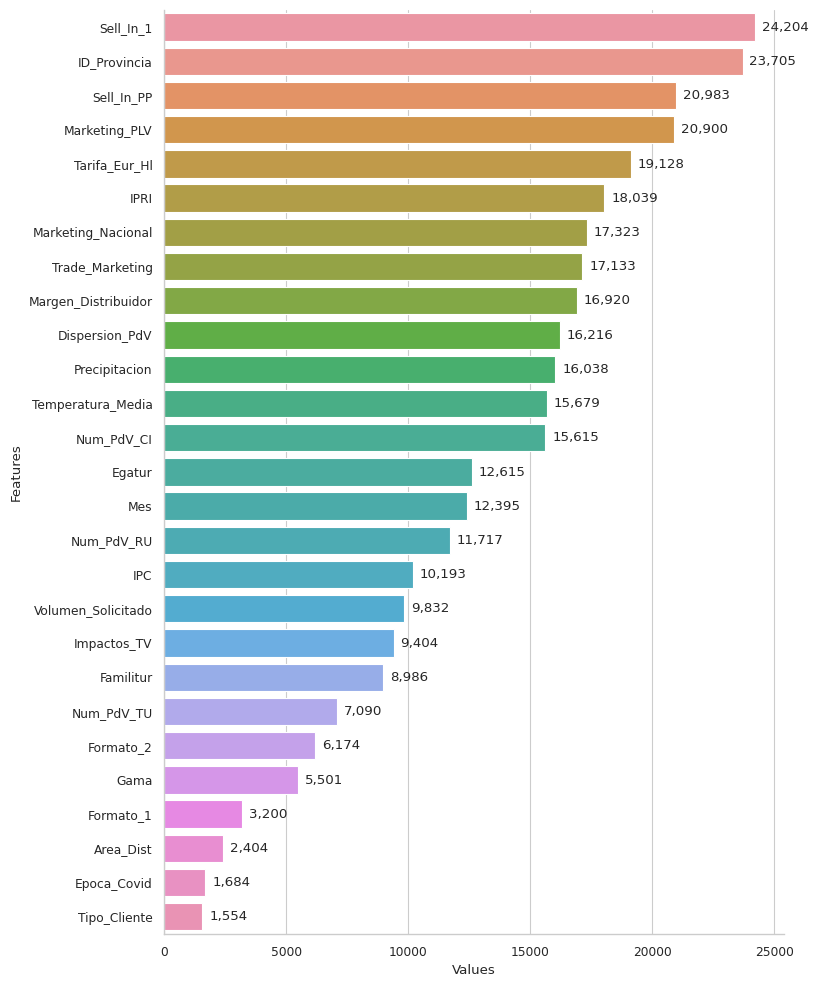

In [20]:
# Figure aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 12))

# Barplot
sns.barplot(
    x='Value',
    y='Feature',
    data=feature_imp
)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Features')

# Add values
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.0f}', padding=5)

# Show the plot
sns.despine()

#### 2.2.4.1. Modelo base III optimizado I

In [21]:
# scikit-learn
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, KFold


# Optuna
# -----------------------------------------------------------------------------
import optuna
import optuna.integration.lightgbm as lgb
optuna.logging.set_verbosity(optuna.logging.FATAL)


# LightGBM
# -----------------------------------------------------------------------------
from lightgbm import early_stopping
from lightgbm import log_evaluation

In [22]:
# Instanciar optimizador
dtrain = lgb.Dataset(train[features], label=train[target])

In [23]:
# Parametros de optimización
max_depth = 10

params = {
    'objective': 'regression',
    'verbosity': -1,
    'metric': 'l1', # mean_absolute_error
    'boosting_type': 'gbdt',
    'max_depth': max_depth,
    'reg_sqrt': True,
    'seed': seed
    }

In [24]:
# Optimizador
tuner = lgb.LightGBMTunerCV(
    params,
    dtrain,
    folds=KFold(n_splits=3),
    #callbacks=[early_stopping(300), log_evaluation(100)]
    )

In [25]:
# Medir tiempo
tiempo_inicial = time()

# Ejecutar optmizador
tuner.run()

# Medir tiempo
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

print('')
print(f'El tiempo de ejecución es de {tiempo_ejecucion/60} minutos')

min_data_in_leaf, val_score: 3.363101: 100%|######################################################################################################| 5/5 [30:34<00:00, 366.80s/it]


El tiempo de ejecución es de 363.209530822436 minutos


In [26]:
# Mejores parámetros
best_params = tuner.best_params
best_params

{'objective': 'regression',
 'verbosity': -1,
 'metric': 'l1',
 'boosting_type': 'gbdt',
 'max_depth': 10,
 'reg_sqrt': True,
 'seed': 123,
 'feature_pre_filter': False,
 'lambda_l1': 6.96339230566609e-06,
 'lambda_l2': 7.499819979556644,
 'num_leaves': 486,
 'feature_fraction': 0.7,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20}

In [27]:
# LightGBM
# -----------------------------------------------------------------------------
import lightgbm as lgb

In [28]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt',
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = max_depth,
    num_leaves = best_params['num_leaves'],
    min_child_samples = best_params['min_child_samples'],
    bagging_fraction = best_params['bagging_fraction'],
    bagging_freq = best_params['bagging_freq'],
    feature_fraction = best_params['feature_fraction'],
    reg_alpha = best_params['lambda_l1'],
    reg_lambda = best_params['lambda_l2'],
    reg_sqrt = True,
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

R2 Score
--------------------------------------------------
Test R2: 0.967
Test R2 Adj: 0.967

Score
--------------------------------------------------
Train: 0.912
Test: 0.816

MAE
--------------------------------------------------
Train: 1.522
Test: 3.049

RMSE
--------------------------------------------------
Train: 7.475
Test: 22.669



#### 2.2.4.2. Modelo base III pruebas aleatorias

In [21]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 350, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.8, # Feature sub-sampling
    reg_alpha = 0, # Regularización l1-lasso
    reg_lambda = 0, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.968
Test R2 Adj: 0.968

Score
--------------------------------------------------
Train: 0.913
Test: 0.815

MAE
--------------------------------------------------
Train: 1.492
Test: 3.075

RMSE
--------------------------------------------------
Train: 6.776
Test: 22.601



In [22]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 400, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 5, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.7, # Feature sub-sampling
    reg_alpha = 0, # Regularización l1-lasso
    reg_lambda = 0.0000001, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.968
Test R2 Adj: 0.968

Score
--------------------------------------------------
Train: 0.919
Test: 0.816

MAE
--------------------------------------------------
Train: 1.4
Test: 3.045

RMSE
--------------------------------------------------
Train: 6.02
Test: 22.292



In [23]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 450, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 5, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.7, # Feature sub-sampling
    reg_alpha = 0.0000001, # Regularización l1-lasso
    reg_lambda = 0.0000001, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.968
Test R2 Adj: 0.968

Score
--------------------------------------------------
Train: 0.922
Test: 0.816

MAE
--------------------------------------------------
Train: 1.335
Test: 3.059

RMSE
--------------------------------------------------
Train: 5.704
Test: 22.549



In [29]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 500, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.75, # Feature sub-sampling
    reg_alpha = 0.00000001, # Regularización l1-lasso
    reg_lambda = 0.00000001, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.969
Test R2 Adj: 0.969

Score
--------------------------------------------------
Train: 0.923
Test: 0.817

MAE
--------------------------------------------------
Train: 1.327
Test: 3.03

RMSE
--------------------------------------------------
Train: 6.029
Test: 22.01



In [30]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 500, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.75, # Feature sub-sampling
    reg_alpha = 5, # Regularización l1-lasso
    reg_lambda = 5, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.967
Test R2 Adj: 0.967

Score
--------------------------------------------------
Train: 0.913
Test: 0.816

MAE
--------------------------------------------------
Train: 1.489
Test: 3.057

RMSE
--------------------------------------------------
Train: 7.1
Test: 22.647



In [32]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 500, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.8, # Feature sub-sampling
    reg_alpha = 20, # Regularización l1-lasso
    reg_lambda = 20, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.966
Test R2 Adj: 0.966

Score
--------------------------------------------------
Train: 0.894
Test: 0.814

MAE
--------------------------------------------------
Train: 1.827
Test: 3.078

RMSE
--------------------------------------------------
Train: 10.521
Test: 23.139



In [33]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 500, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.8, # Feature sub-sampling
    reg_alpha = 100, # Regularización l1-lasso
    reg_lambda = 100, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.961
Test R2 Adj: 0.961

Score
--------------------------------------------------
Train: 0.849
Test: 0.806

MAE
--------------------------------------------------
Train: 2.591
Test: 3.217

RMSE
--------------------------------------------------
Train: 19.785
Test: 24.61



In [34]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 500, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.9, # Feature sub-sampling
    reg_alpha = 100, # Regularización l1-lasso
    reg_lambda = 100, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.959
Test R2 Adj: 0.959

Score
--------------------------------------------------
Train: 0.852
Test: 0.805

MAE
--------------------------------------------------
Train: 2.555
Test: 3.23

RMSE
--------------------------------------------------
Train: 19.418
Test: 25.483



In [35]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 600, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.8, # Feature sub-sampling
    reg_alpha = 80, # Regularización l1-lasso
    reg_lambda = 80, # Regularización l2-ridge
    reg_sqrt = True, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.962
Test R2 Adj: 0.962

Score
--------------------------------------------------
Train: 0.856
Test: 0.808

MAE
--------------------------------------------------
Train: 2.472
Test: 3.179

RMSE
--------------------------------------------------
Train: 18.262
Test: 24.362



In [31]:
# Instanciar modelo
mlgb = lgb.LGBMRegressor(
    boosting_type = 'gbdt', # Gradient Boosting Decision Tree
    learning_rate = 0.1, # Boosting learning rate (default value)
    n_estimators = 1000, # Número de árboles (originalmente 1000)
    max_depth = 10, # Profundidad máxima del árbol [3, 12]
    num_leaves = 500, # Número de hojas máximo del árbol, <2^max_depth
    min_child_samples = 10, # Número mínimo de registros en una hoja
    bagging_fraction = 1.0, # Porcentaje de datos cogidos en cada re-sampling del Bagging
    bagging_freq = 0, # Frecuencia del Bagging
    feature_fraction = 0.75, # Feature sub-sampling
    reg_alpha = 5, # Regularización l1-lasso
    reg_lambda = 5, # Regularización l2-ridge
    reg_sqrt = False, # Raíz cuadrada del target, para variables a predecir con mucha variabilidad
    feature_pre_filter = False,
    random_state = seed,
    n_jobs = -1
)


# Pipeline
model_pipeline = Pipeline(steps=[("mlgb", mlgb)])


# Entrenar modelo
model = model_pipeline.fit(train[features], train[target])


# Cálculo de métricas
train_y_real = train[target]
train_y_pred = model.predict(train[features])

test_y_real = test[target]
test_y_pred = model.predict(test[features])

metric_test_r2 = round(r2_score(test_y_real, test_y_pred), 3)
metric_adj_test_r2 = round(1-(1-metric_test_r2)*(len(test)-1)/(len(test)-len(features)-1), 3)

metric_train_mae = round(mean_absolute_error(train_y_real, train_y_pred), 3)
metric_test_mae = round(mean_absolute_error(test_y_real, test_y_pred), 3)

metric_train_rmse = round(mean_squared_error(train_y_real, train_y_pred, squared=False), 3)
metric_test_rmse = round(mean_squared_error(test_y_real, test_y_pred, squared=False), 3)

metric_train_score = round(1.00 - (metric_train_mae / train_y_real.mean()), 3)
metric_test_score = round(1.00 - (metric_test_mae / test_y_real.mean()), 3)


# Mostrar
print('R2 Score')
print(50*'-')
print(f'Test R2: {metric_test_r2}')
print(f'Test R2 Adj: {metric_adj_test_r2}')
print('')

print('Score')
print(50*'-')
print(f'Train: {metric_train_score}')
print(f'Test: {metric_test_score}')
print('')

print('MAE')
print(50*'-')
print(f'Train: {metric_train_mae}')
print(f'Test: {metric_test_mae}')
print('')

print('RMSE')
print(50*'-')
print(f'Train: {metric_train_rmse}')
print(f'Test: {metric_test_rmse}')
print('')

[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
R2 Score
--------------------------------------------------
Test R2: 0.964
Test R2 Adj: 0.964

Score
--------------------------------------------------
Train: 0.908
Test: 0.797

MAE
--------------------------------------------------
Train: 1.578
Test: 3.364

RMSE
--------------------------------------------------
Train: 5.026
Test: 23.918



In [28]:
# Step 1: Define parameter grid for hyperparameter tuning
param_grid = {
    'boosting_type': ['gbdt'],
    'learning_rate': [0.1],
    'n_estimators': [1000],
    'max_depth': [10],
    'num_leaves': [500],
    'min_child_samples': [5, 10],
    'bagging_fraction': [1.0],
    'bagging_freq': [0],
    'feature_fraction': [0.8],
    'reg_alpha': [1],
    'reg_lambda': [1],
    'reg_sqrt': [True],
    'feature_pre_filter': [False]
}


# Step 2: Initialize LGBMRegressor estimattor
estimator = lgb.LGBMRegressor(random_state=seed)


# Step 3: Initalise Grid Search with 3-fold cross validation and fit model
model = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    cv = 2, 
    n_jobs = -1, 
    scoring = 'neg_mean_absolute_error'
)

model.fit(train[features], train[target])


# Step 4: Print best parameters
best_params = model.best_estimator_
print(best_params)

KeyboardInterrupt: 

In [ ]:
# Generamos 3 columnas adicionales con el dato de Sell_In del mes n-1, n-2 y n-3
df['Sell_In_1']= df.sort_values(by=['Cliente', 'Gama', 'Formato', 'Fecha'], ascending=True) \
                   .groupby(['Cliente', 'Gama', 'Formato'])['Sell_In'] \
                   .shift(periods=1, fill_value=0)

df['Sell_In_2']= df.sort_values(by=['Cliente', 'Gama', 'Formato', 'Fecha'], ascending=True) \
                   .groupby(['Cliente', 'Gama', 'Formato'])['Sell_In'] \
                   .shift(periods=2, fill_value=0)

df['Sell_In_3']= df.sort_values(by=['Cliente', 'Gama', 'Formato', 'Fecha'], ascending=True) \
                   .groupby(['Cliente', 'Gama', 'Formato'])['Sell_In'] \
                   .shift(periods=3, fill_value=0)